In [2]:
# %load_ext autotime
# !pip install autotime
%load_ext autoreload
%autoreload 2

In [3]:
from pathlib import Path
import os
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import torch

pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 100)

base_path = Path("/scratch/project/open-32-14/pimenol1/ProteinTTT/ProteinTTT/data/bfvd")
OUTPUT_PDB = base_path / Path('predicted_structures')
CLEAN_DF_PATH = base_path / Path('subset_1.tsv')
RESULTS_PATH = base_path / Path('results.tsv')

/scratch/project/open-32-14/pimenol1/miniconda3/envs/esmfold/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
len(os.listdir(OUTPUT_PDB))

509728

## Dataset

### Merging dataset with after results

In [ ]:
results_after_old = pd.read_csv(base_path / "results_after.tsv", sep="\t")

In [8]:
results_after = pd.DataFrame(columns=df_clean.columns)
for file in os.listdir(base_path):
    if file.startswith("results_70"):
        temp_df = pd.read_csv(base_path / file, sep="\t")
        results_after = pd.concat([results_after, temp_df.query("pLDDT_after.notna()")], ignore_index=True)
results_after

/tmp/ipykernel_532233/3539270430.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_after = pd.concat([results_after, temp_df.query("pLDDT_after.notna()")], ignore_index=True)


,id,sequence,lenghth,pLDDT_after,pLDDT_before,tm_score_before,tm_score_after,lddt_before,lddt_after,plddt_AlphaFold,time,chain,chain_type,resolution
0,A0A2I6UHQ6,MFFLINIYPFTIILLFCIVIPAIAGWVWTGQRIERERQVEDEFQRLQEENERLKRELDKDK,61,72.747089,71.612079,0.89719,0.80871,0.969059,0.961793,NaN,35.600832,NaN,NaN,NaN
1,A0A7S9SUA4,MANGTTHEIEYDNVVLNVTGFYEPEEKEVTYDTDMAGYPGSPANFESHIISCGGQDIIGILHYDTIAEIETLILNKYYEHDY,82,73.831822,72.926340,0.74156,0.74318,0.814534,0.817929,NaN,35.186247,NaN,NaN,NaN
2,Q0E5Z7,MTDRIQKLNDQIATLEAKAAELIAKANTLREELVSLERIQSIAERDAVTFEIGRKDDKQLVTGVVLGVADTDAGKQIRVFVEAGFNSTTYTLKASQ...,117,77.773634,76.510936,0.81456,0.86667,0.931140,0.941972,NaN,37.533278,NaN,NaN,NaN
3,A0A3G5AB69,MQPDNNTVHVINRLQKVLYGPTLKNAIDATPQIKKFIQRNTIIDTHHNINSIIGIPPDTRVPKKLYIFTDDLNSYPNITIDECGDFLSEKLIFLNT...,391,67.312508,24.560019,0.22002,0.61611,0.212916,0.698085,NaN,254.184916,NaN,NaN,NaN
4,A0A2I2L5X4,MDNVIRVKRDHVLSGIPRLKATEENKYGLILDFDKTLCPLLKPNISSSAHCKSLNEQSVKEVIEFLYGLKYAGWKLFILSNNKQNKILDFLGSLRI...,164,85.843680,85.044502,0.83670,0.84838,0.793203,0.805092,NaN,53.381765,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25010,A0A7G9VRZ6,MFFRAVKEGGETGASLESLDLNYLVKLNEWLDIQSYMESDVEKQIERKHKQKG,53,70.857189,43.438180,0.54798,0.89005,0.713582,0.918402,NaN,34.339428,NaN,NaN,NaN
25011,A0A6J5L6A1,MDPKQEFHEFVLEGHAEYIESLGVQVHQLQRELYRALDRIASQGTKISELEQRLNHNLKFKTI,63,83.717186,46.114030,0.48986,0.82569,0.905997,0.977125,NaN,34.659521,NaN,NaN,NaN
25012,A0A7T3NAL3,MKKYLAKVNGHFITKRGFGMSRKKAIRFNSPEAALAHIREHHPHAIGDGSAQVVEA,56,88.268307,43.679245,0.41872,0.98085,0.373711,0.984938,NaN,34.977880,NaN,NaN,NaN
25013,A0A6J5T129,MTSSINPNNIDGTYPIAGQDNNSQGFRDNFTNTKTNFGYAETEINDLQSKAVLKAALTGTTLNNDMLGSPLINAQIQDFSATRVALGTVSGAVGIN...,298,75.186167,74.882585,0.62636,0.58757,0.798952,0.788879,NaN,141.915113,NaN,NaN,NaN


In [ ]:
results_after = pd.concat([results_after_old, results_after], ignore_index=True)
results_after.drop_duplicates('id').reset_index(drop=True).sort_values('plddt_AlphaFold')
results_after.to_csv(base_path / "results_after.tsv", sep="\t", index=False)

In [ ]:
df_clean_after = pd.read_csv(base_path / Path('to_process.tsv'), sep="\t")
df_clean_after = df_clean_after[~df_clean_after.id.isin(results_after.id)]
df_clean_after.to_csv(base_path / "to_process.tsv", sep="\t", index=False)
df_clean_after.shape[0]

,id,sequence,lenghth,pLDDT_after,pLDDT_before,tm_score_before,tm_score_after,lddt_before,lddt_after,plddt_AlphaFold,time,chain,chain_type,resolution
0,A0A514D6K6,MSSKLPSVPTAYRIGLPWNHQSRSNSSVQSQATLAPKSIEKTWVWNWIGNLSVAAVRSKEKAGNPSLIRGRTQFSTGAHWSKVPSCSISLRVRNNE...,340,NaN,25.904492,0.20715,NaN,0.427372,NaN,25.253777,7.294163,NaN,NaN,NaN
1,S5MV57,MLRPGQILVVIEVGAIGRAVQNVLKRRAGLRKVRPVNVRLYIRNPLVFDGVDDRRSTRRCADQGCPDSEDLARANAGVLQVKPCRCAGVDVIDASN...,301,NaN,26.991923,0.21473,NaN,0.392321,NaN,26.056854,5.878517,NaN,NaN,NaN
2,A0A0B5J9A7,MGVQGNGVTARSSESVGMCAASCATGSTPGDIEASFLEAVKVAVGIGAGAATGTKGVLSATRDKPETADSAESVDTGVWYVAVGAIIADGVGIGGS...,286,NaN,52.699550,0.14938,NaN,0.315294,NaN,27.028377,NaN,NaN,NaN,NaN
3,A0A8A5J3S7,MTFRNRVGLTSAGGCCCPTLMTINQNVINNDINSPCGATSPYNFDAVVANRASVNPLGFGTRNISVISPASPTYTPTIDDYTGVYLRYNGNPITRP...,273,NaN,25.844972,0.23155,NaN,0.390325,NaN,27.690028,5.123583,NaN,NaN,NaN
4,D4P830,MTVTTSQAPTSPSLHVPRSIADQFADLLYRRQETAARIDLLGKESAKYRDYLARNDRTSSETALNPPNDKRTIVYAAERTYSEYQVHAFTSKAGID...,331,NaN,27.339002,0.23953,NaN,0.483782,NaN,27.889210,6.953617,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88213,A0A6B9J8H2,MSDILNGAERIATERERQVSEEGYDVEHDRGHASELMAAAESYLLVARFGKDAWIDPDGTPVPPGGWPWSHADWKPADDAERNLEKAGALVAAAID...,127,NaN,74.950858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88214,A0A8D9CF15,MIAKRYIEQGVKIREEYLDVSKKLEAILTDIKGVGLQLKKHTEDLKYISENLDGYDGEQAKLVILNKLTDVEIQGNKLTAIYKPVNEKLESLKKQE...,127,NaN,77.264207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88215,A0A4Y5FEL7,MSVDAKLDENGNPDITDGSLIVNGIEELKQSLSLRLKSQVGWAKDDDDFGVEWLGFFDDVSGGSIAEQKIREAIEHDPRVNAVTDIELDIDDNTRT...,127,NaN,75.569249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88216,A0A3Q9R5Z0,MFSKLVRIGKDATLKFTPSGTAILEINAVYDIGFGDKKESQWIRLAMFGQRAEKLQAHFTKGTQILVHADDIKARAYMTKSGEAGCSLEGKLVEFQ...,127,NaN,70.283217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Merging base dataset 

In [15]:
df_clean = pd.read_csv(CLEAN_DF_PATH, sep="\t")
results_old = pd.read_csv(RESULTS_PATH, sep="\t")
results_old.shape[0], df_clean.shape[0]

(284076, 60444)

In [ ]:
results = pd.DataFrame(columns=df_clean.columns)
for file in os.listdir(base_path):
    if file.startswith("results_"):
        temp_df = pd.read_csv(base_path / file, sep="\t")
        results = pd.concat([results, temp_df.query("pLDDT_before.notna()")], ignore_index=True)
results

/tmp/ipykernel_4030436/73364277.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, temp_df.query("pLDDT_after.notna()")], ignore_index=True)


,id,sequence,lenghth,pLDDT_after,pLDDT_before,tm_score_before,tm_score_after,lddt_before,lddt_after,plddt_AlphaFold,time,chain,chain_type,resolution
0,A0A2I6UHQ6,MFFLINIYPFTIILLFCIVIPAIAGWVWTGQRIERERQVEDEFQRLQEENERLKRELDKDK,61,72.747089,71.612079,0.89719,0.80871,0.969059,0.961793,NaN,35.600832,NaN,NaN,NaN
1,A0A7S9SUA4,MANGTTHEIEYDNVVLNVTGFYEPEEKEVTYDTDMAGYPGSPANFESHIISCGGQDIIGILHYDTIAEIETLILNKYYEHDY,82,73.831822,72.926340,0.74156,0.74318,0.814534,0.817929,NaN,35.186247,NaN,NaN,NaN
2,Q0E5Z7,MTDRIQKLNDQIATLEAKAAELIAKANTLREELVSLERIQSIAERDAVTFEIGRKDDKQLVTGVVLGVADTDAGKQIRVFVEAGFNSTTYTLKASQ...,117,77.773634,76.510936,0.81456,0.86667,0.931140,0.941972,NaN,37.533278,NaN,NaN,NaN
3,A0A3G5AB69,MQPDNNTVHVINRLQKVLYGPTLKNAIDATPQIKKFIQRNTIIDTHHNINSIIGIPPDTRVPKKLYIFTDDLNSYPNITIDECGDFLSEKLIFLNT...,391,67.312508,24.560019,0.22002,0.61611,0.212916,0.698085,NaN,254.184916,NaN,NaN,NaN
4,A0A2I2L5X4,MDNVIRVKRDHVLSGIPRLKATEENKYGLILDFDKTLCPLLKPNISSSAHCKSLNEQSVKEVIEFLYGLKYAGWKLFILSNNKQNKILDFLGSLRI...,164,85.843680,85.044502,0.83670,0.84838,0.793203,0.805092,NaN,53.381765,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25010,A0A7G9VRZ6,MFFRAVKEGGETGASLESLDLNYLVKLNEWLDIQSYMESDVEKQIERKHKQKG,53,70.857189,43.438180,0.54798,0.89005,0.713582,0.918402,NaN,34.339428,NaN,NaN,NaN
25011,A0A6J5L6A1,MDPKQEFHEFVLEGHAEYIESLGVQVHQLQRELYRALDRIASQGTKISELEQRLNHNLKFKTI,63,83.717186,46.114030,0.48986,0.82569,0.905997,0.977125,NaN,34.659521,NaN,NaN,NaN
25012,A0A7T3NAL3,MKKYLAKVNGHFITKRGFGMSRKKAIRFNSPEAALAHIREHHPHAIGDGSAQVVEA,56,88.268307,43.679245,0.41872,0.98085,0.373711,0.984938,NaN,34.977880,NaN,NaN,NaN
25013,A0A6J5T129,MTSSINPNNIDGTYPIAGQDNNSQGFRDNFTNTKTNFGYAETEINDLQSKAVLKAALTGTTLNNDMLGSPLINAQIQDFSATRVALGTVSGAVGIN...,298,75.186167,74.882585,0.62636,0.58757,0.798952,0.788879,NaN,141.915113,NaN,NaN,NaN


In [ ]:
df = pd.concat([results_old, results], ignore_index=True)
df.shape[0], df.drop_duplicates('id').shape[0]

(25015, 25015)

In [9]:
df = df.drop_duplicates('id').reset_index(drop=True).sort_values('plddt_AlphaFold')
df.to_csv(RESULTS_PATH, sep="\t", index=False)

In [10]:
# df_clean = pd.concat([df_clean, df_new], ignore_index=True).reset_index(drop=True)
df_clean.shape[0], df_clean[~df_clean.id.isin(df.id)].shape[0]

(60444, 60444)

In [11]:
df_clean = df_clean[~df_clean.id.isin(df.id)]
df_clean.to_csv(CLEAN_DF_PATH, sep="\t", index=False)
df_clean.shape[0]

60444

In [12]:
df['diff_alphafold'] = df['pLDDT_after'] - df['plddt_AlphaFold']
df['diff_esmfold'] = df['pLDDT_after'] - df['pLDDT_before']
# top the biggest diff in alpha and esmfold
df = df.sort_values('diff_alphafold', ascending=False).reset_index(drop=True)
df[['id', 'plddt_AlphaFold', 'pLDDT_before', 'pLDDT_after', 'diff_alphafold', 'diff_esmfold']].head(20)

,id,plddt_AlphaFold,pLDDT_before,pLDDT_after,diff_alphafold,diff_esmfold
0,D9I638,34.970780,68.245653,86.420350,51.449570,18.174697
1,A0A2D1GN07,35.401729,67.480757,84.389921,48.988192,16.909164
2,A0A0U2SAI9,33.150204,32.305160,81.254745,48.104541,48.949585
3,A0A6G5Y4Q2,30.361990,61.629125,78.378090,48.016100,16.748965
4,A0A6N3IKL3,34.006078,55.247447,81.875618,47.869540,26.628170
5,A0A3G5A3B6,37.209442,64.636531,84.603320,47.393878,19.966789
6,A0A2I7RYL9,32.585502,65.114141,79.540568,46.955066,14.426426
7,A0A386KPX7,30.300997,67.907449,76.315031,46.014034,8.407582
8,A0A514CTB1,33.680400,65.814355,79.546236,45.865836,13.731882
9,A0A6G6XY90,33.147274,67.741574,78.791702,45.644428,11.050129


In [22]:
df['diff_tm_esm'] = df['tm_score_after_original'] - df['tm_score_before_original']
df['diff_tm_alphafold'] = df['tm_score_after_original'] - df['tm_score_after_AlphaFold']
df = df.sort_values('diff_tm_esm', ascending=False).reset_index(drop=True)
df[['id', 'tm_score_after_AlphaFold', 'tm_score_before_original', 'tm_score_after_original', 'plddt_AlphaFold', 'diff_tm_alphafold', 'diff_tm_esm']].head(30)

,id,tm_score_after_AlphaFold,tm_score_before_original,tm_score_after_original,plddt_AlphaFold,diff_tm_alphafold,diff_tm_esm
0,UPI0009AAEB55,NaN,0.13030,0.75563,84.757770,NaN,0.62533
1,UPI000035883D,NaN,0.28484,0.81859,90.973590,NaN,0.53375
2,UPI0000110744,NaN,0.16058,0.68217,85.661616,NaN,0.52159
3,UPI0000112E3F,0.77539,0.28425,0.75913,89.065147,-0.01626,0.47488
4,UPI0018C8D4D4,NaN,0.23925,0.69513,91.795834,NaN,0.45588
5,UPI0001B04C70,NaN,0.25212,0.69185,85.919240,NaN,0.43973
6,UPI0007F04AD2,0.89760,0.46968,0.84899,87.167514,-0.04861,0.37931
7,A7XXR5,0.70590,0.33501,0.70634,76.530336,0.00044,0.37133
8,UPI000DCF63DB,0.72536,0.37536,0.73422,88.420012,0.00886,0.35886
9,UPI0008A09DB8,0.80068,0.47233,0.79570,87.434978,-0.00498,0.32337


## Plots

Entries with pLDDT before and after: 194,083


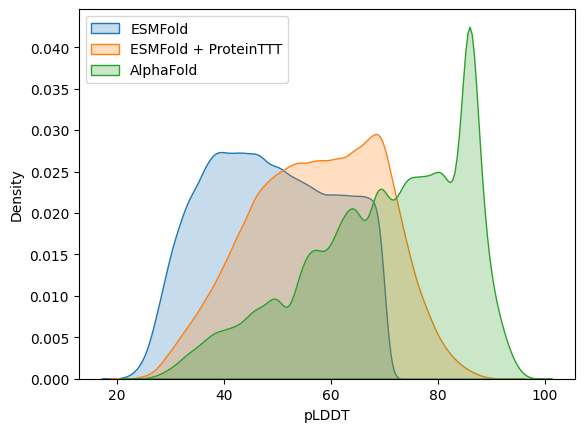

In [6]:
sub_df = results_old.query("pLDDT_before.notna() and pLDDT_after.notna()")
print(f"Entries with pLDDT before and after: {len(sub_df):,}")

sns.kdeplot(sub_df['pLDDT_before'], label='ESMFold', fill=True)
sns.kdeplot(sub_df['pLDDT_after'], label='ESMFold + ProteinTTT', fill=True)
sns.kdeplot(sub_df['plddt_AlphaFold'], label='AlphaFold', fill=True)
plt.xlabel('pLDDT')
plt.legend()
plt.show()

In [8]:
df_clean.plddt_AlphaFold.describe()

count    23900.000000
mean        72.968451
std         10.905027
min         27.544796
25%         67.110275
50%         73.512056
75%         80.932510
max         97.206263
Name: plddt_AlphaFold, dtype: float64

In [36]:
sub_df.tm_score_after.describe(), sub_df.tm_score_before.describe()

(count    186985.000000
 mean          0.461059
 std           0.184413
 min           0.075130
 25%           0.310390
 50%           0.422570
 75%           0.586940
 max           0.993960
 Name: tm_score_after, dtype: float64,
 count    187024.000000
 mean          0.450261
 std           0.170658
 min           0.070630
 25%           0.312890
 50%           0.415700
 75%           0.565610
 max           0.986200
 Name: tm_score_before, dtype: float64)

In [12]:
df.lddt_after.describe(), df.lddt_before.describe()

(count    48.000000
 mean      0.446614
 std       0.180932
 min       0.185748
 25%       0.282080
 50%       0.407616
 75%       0.561028
 max       0.792706
 Name: lddt_after, dtype: float64,
 count    87.000000
 mean      0.504442
 std       0.239873
 min       0.163724
 25%       0.304979
 50%       0.415594
 75%       0.733089
 max       0.973206
 Name: lddt_before, dtype: float64)

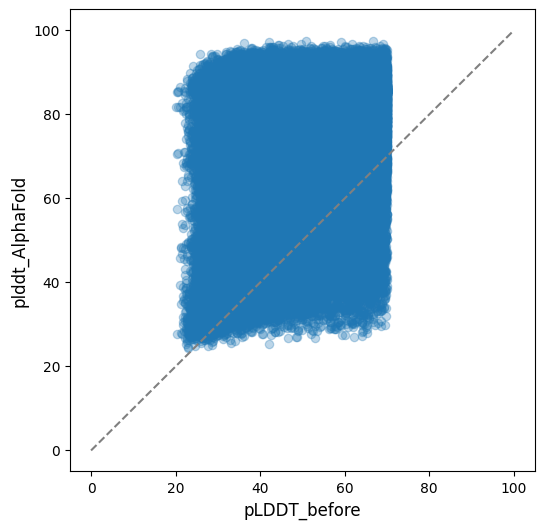

In [37]:
fig, ax = plt.subplots(figsize=(6, 6))
sc = ax.scatter(sub_df['pLDDT_before'], sub_df['plddt_AlphaFold'], alpha=0.3, linewidths=0.9)

ax.plot([0, 100], [0, 100], linestyle='--', color='grey', label='y=x')

ax.set_xlabel("pLDDT_before", fontsize=12)
ax.set_ylabel("plddt_AlphaFold", fontsize=12)
plt.show()

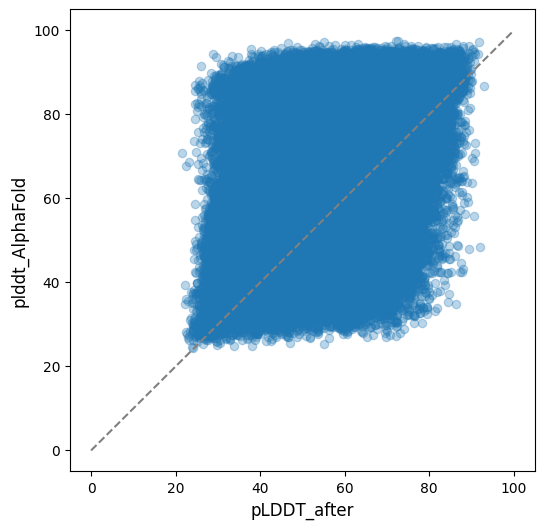

In [38]:
fig, ax = plt.subplots(figsize=(6, 6))
sc = ax.scatter(sub_df['pLDDT_after'], sub_df['plddt_AlphaFold'], alpha=0.3, linewidths=0.9)

ax.plot([0, 100], [0, 100], linestyle='--', color='grey', label='y=x')

ax.set_xlabel("pLDDT_after", fontsize=12)
ax.set_ylabel("plddt_AlphaFold", fontsize=12)
plt.show()

nan nan


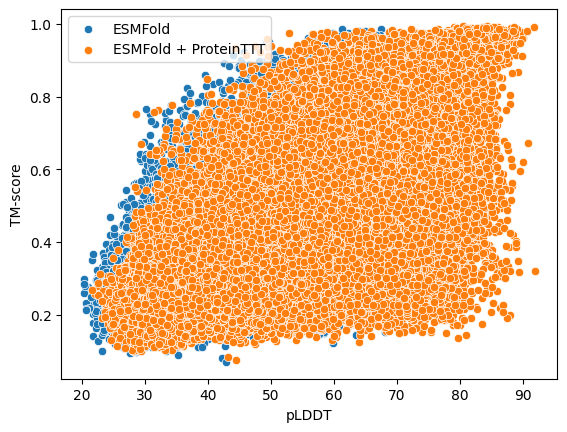

In [14]:
print(np.corrcoef(sub_df['pLDDT_before'], sub_df['tm_score_before'])[0, 1], np.corrcoef(sub_df['pLDDT_after'], y=sub_df['tm_score_after'])[0, 1])
sns.scatterplot(data=sub_df, x='pLDDT_before', y='tm_score_before', label='ESMFold')
sns.scatterplot(data=sub_df, x='pLDDT_after', y='tm_score_after', label='ESMFold + ProteinTTT')
plt.xlabel('pLDDT')
plt.ylabel('TM-score')
plt.legend()
plt.show()

nan nan


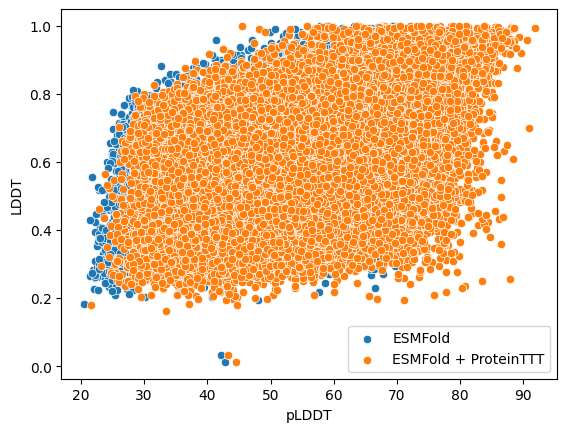

In [27]:
print(np.corrcoef(sub_df['pLDDT_before'], sub_df['lddt_before'])[0, 1], np.corrcoef(sub_df['pLDDT_after'], sub_df['lddt_after'])[0, 1])
sns.scatterplot(sub_df, x='pLDDT_before', y='lddt_before', label='ESMFold')
sns.scatterplot(sub_df, x='pLDDT_after', y='lddt_after', label='ESMFold + ProteinTTT')
plt.xlabel('pLDDT')
plt.ylabel('LDDT')
plt.legend()

In [28]:
sub_df['tm_score_difference'] = sub_df['tm_score_after'] - sub_df['tm_score_before']
plt.figure(figsize=(6, 6))
sns.boxplot(data=sub_df[['tm_score_difference']])
sns.swarmplot(data=sub_df[['tm_score_difference']], color=".25")
plt.ylabel('tm_score_difference')
# plt.xticks([0, 1], ['tm_score_difference'])
plt.show()

/tmp/ipykernel_1306274/709628841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['tm_score_difference'] = sub_df['tm_score_after'] - sub_df['tm_score_before']


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x1472f54f05e0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [14]:
sub_df.pLDDT_before.describe(), sub_df.pLDDT_after.describe()

(count    78680.000000
 mean        49.027842
 std         12.158377
 min         20.331049
 25%         38.786255
 50%         48.721753
 75%         59.705194
 max         69.998968
 Name: pLDDT_before, dtype: float64,
 count    78680.000000
 mean        57.656607
 std         12.239061
 min         21.599748
 25%         48.463769
 50%         58.670126
 75%         67.542062
 max         91.803119
 Name: pLDDT_after, dtype: float64)

In [ ]:
sub_df

## Priority

In [ ]:
column_names = ['id', 'pdb_id', 'col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9', 'col10']
df_100 = pd.read_csv(base_path / Path('bfvd_pdb100_mapping_lddt_nmsa_tophit.tsv'), sep='\t', names=column_names, header=None)
df_100

In [33]:
from proteinttt.utils.parsers import download_structure_and_extract_chain
df = pd.read_csv(base_path / Path('priority_sequences.tsv'), sep='\t')
df

,id,pdb_id,pdb,chain,sequence,lenghth,pLDDT_after,pLDDT_before,plddt_AlphaFold,tm_score_before_AlphaFold,tm_score_after_AlphaFold,lddt_before_AlphaFold,lddt_after_AlphaFold,tm_score_before_original,tm_score_after_original,lddt_before_original,lddt_after_original
0,A0A068EP60,6yf7_AA,6yf7,AA,MSITKYSESAGPIGQSIYTFTGVTVPAQYMPRLVATTTVNKAGTNIEYKIAVNYPLVSVVDGANVALNTIRANLSFTALQSVINTDEKLRVLDEIV...,116,57.062431,44.714117,85.722385,0.56515,0.68990,0.707223,0.801189,NaN,NaN,NaN,NaN
1,A0A097I2D0,7n8n_C,7n8n,C,MSKAGKKVKAQQHGHLADHVSVGETQIPKASTQHLLRKAGSLSAAGDTEVPIRGFVHMKLHKLVQKSLLAMQLAKRKTIMKSDVKKAAELMHLPVF...,216,NaN,81.867753,79.719927,0.81715,NaN,0.808683,NaN,0.76943,NaN,NaN,NaN
2,A0A0A0U955,6djy_D,6djy,D,MIDLRLEEDILTATLPEFLSTRPKYRYAYTNTKQQDIRFQGPMRHVRLTHLYKQTKLWNLQYIERELAISEIDDALDEFIQTFSLPYVIEQGTYKY...,1056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A0A0A1IVS8,6yse_A,6yse,A,MKSPYEAAHERALMVNRLQKLTRMLRVHPDPKWKQEQQELIKRLKK,46,NaN,84.480987,89.373722,0.90924,NaN,0.978661,NaN,0.79824,NaN,0.946639,NaN
4,A0A0X1KHD2,5bpe_A,5bpe,A,GPAFEFAVAMMKRNSSTVKTEYGEFTMLGIYDRWAVLPRHSKPGPTILMNDQEVGVLDAKELVDKDGTNLELTLLKLNRNEKFRDIRGFLAKEEVE...,180,NaN,87.086629,92.159366,0.99644,NaN,0.991329,NaN,0.99047,NaN,0.967698,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,UPI002249A336,7xc3_A,7xc3,A,FQHMGTVSWNLREMLAHAEETRKLMPVCVETKAIVSTIQRKYKGIKIQEGVVDYGARFYFYTSKTTVASLINTLNDLNETLVTMPLGYVTHGLNLE...,129,60.894505,36.735545,92.220317,0.41014,0.35038,0.381455,0.327634,0.41775,0.35142,NaN,NaN
289,UPI002249A33C,8a55_A,8a55,A,MEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHLKDGTCGLVEVEKGVLPQLEQPYVFIKRSDARTAPHGHVMVELVAELEGIQYGRSGETL...,118,43.609435,32.599739,85.082185,0.27511,NaN,0.352780,NaN,0.29808,0.31438,0.250078,0.275978
290,UPI0022AB4E73,8hda_B,8hda,B,GSHMYKSVNITFELDERIDKVLNEKCSAYTVELGTEVNEFACVVADAVIKTLQPVSELLTPLGIDLDEWSMATYYLFDESGEFKLASHMYCSFYPPDE,98,62.616521,45.697022,88.754365,0.47669,0.43342,0.428792,0.403604,0.48330,0.43869,NaN,NaN
291,UPI002348EE55,7n0i_H,7n0i,H,GNVTQAFGRRGPEQTQGNFGDQELIRQGTDYKHWPQIAQFAPSASAFFGMSRIGMEVTPSGTWLTYTGAIKLDDKDPNFKDQVILLNKHIDAYKTF...,100,41.450442,35.584463,85.793401,0.40000,0.27390,0.494298,0.362563,0.36706,0.27374,NaN,NaN


In [ ]:
# df = df.merge(df_100[['id', 'pdb_id']], on='id', how='left', suffixes=('', '_100'))

In [60]:
from proteinttt.utils.parsers import download_chain_cif_to_pdb

for i, row in df.iterrows():
    pdb = row['pdb_id'].split('_')[0]
    chain_id = row['pdb_id'].split('_')[1]
    if pd.notna(row['tm_score_before_original']):
        continue
    # df.loc[i, 'chain'] = chain_id
    # df.loc[i, 'pdb'] = pdb
    download_chain_cif_to_pdb(pdb, chain_id, f"{pdb}_{chain_id}.pdb")    

Could not find _atom_site data in the CIF file.
Could not find _atom_site data in the CIF file.


IndexError: list index out of range

In [59]:
df

,id,pdb_id,pdb,chain,sequence,lenghth,pLDDT_after,pLDDT_before,plddt_AlphaFold,tm_score_before_AlphaFold,tm_score_after_AlphaFold,lddt_before_AlphaFold,lddt_after_AlphaFold,tm_score_before_original,tm_score_after_original,lddt_before_original,lddt_after_original
0,A0A068EP60,6yf7_AA,6yf7,AA,MSITKYSESAGPIGQSIYTFTGVTVPAQYMPRLVATTTVNKAGTNIEYKIAVNYPLVSVVDGANVALNTIRANLSFTALQSVINTDEKLRVLDEIV...,116,57.062431,44.714117,85.722385,0.56515,0.68990,0.707223,0.801189,NaN,NaN,NaN,NaN
1,A0A097I2D0,7n8n_C,7n8n,C,MSKAGKKVKAQQHGHLADHVSVGETQIPKASTQHLLRKAGSLSAAGDTEVPIRGFVHMKLHKLVQKSLLAMQLAKRKTIMKSDVKKAAELMHLPVF...,216,NaN,81.867753,79.719927,0.81715,NaN,0.808683,NaN,0.76943,NaN,NaN,NaN
2,A0A0A0U955,6djy_D,6djy,D,MIDLRLEEDILTATLPEFLSTRPKYRYAYTNTKQQDIRFQGPMRHVRLTHLYKQTKLWNLQYIERELAISEIDDALDEFIQTFSLPYVIEQGTYKY...,1056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A0A0A1IVS8,6yse_A,6yse,A,MKSPYEAAHERALMVNRLQKLTRMLRVHPDPKWKQEQQELIKRLKK,46,NaN,84.480987,89.373722,0.90924,NaN,0.978661,NaN,0.79824,NaN,0.946639,NaN
4,A0A0X1KHD2,5bpe_A,5bpe,A,GPAFEFAVAMMKRNSSTVKTEYGEFTMLGIYDRWAVLPRHSKPGPTILMNDQEVGVLDAKELVDKDGTNLELTLLKLNRNEKFRDIRGFLAKEEVE...,180,NaN,87.086629,92.159366,0.99644,NaN,0.991329,NaN,0.99047,NaN,0.967698,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,UPI002249A336,7xc3_A,7xc3,A,FQHMGTVSWNLREMLAHAEETRKLMPVCVETKAIVSTIQRKYKGIKIQEGVVDYGARFYFYTSKTTVASLINTLNDLNETLVTMPLGYVTHGLNLE...,129,60.894505,36.735545,92.220317,0.41014,0.35038,0.381455,0.327634,0.41775,0.35142,NaN,NaN
289,UPI002249A33C,8a55_A,8a55,A,MEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHLKDGTCGLVEVEKGVLPQLEQPYVFIKRSDARTAPHGHVMVELVAELEGIQYGRSGETL...,118,43.609435,32.599739,85.082185,0.27511,NaN,0.352780,NaN,0.29808,0.31438,0.250078,0.275978
290,UPI0022AB4E73,8hda_B,8hda,B,GSHMYKSVNITFELDERIDKVLNEKCSAYTVELGTEVNEFACVVADAVIKTLQPVSELLTPLGIDLDEWSMATYYLFDESGEFKLASHMYCSFYPPDE,98,62.616521,45.697022,88.754365,0.47669,0.43342,0.428792,0.403604,0.48330,0.43869,NaN,NaN
291,UPI002348EE55,7n0i_H,7n0i,H,GNVTQAFGRRGPEQTQGNFGDQELIRQGTDYKHWPQIAQFAPSASAFFGMSRIGMEVTPSGTWLTYTGAIKLDDKDPNFKDQVILLNKHIDAYKTF...,100,41.450442,35.584463,85.793401,0.40000,0.27390,0.494298,0.362563,0.36706,0.27374,NaN,NaN


In [42]:
df.query("tm_score_before_original.isna()").head(1)

,id,pdb_id,pdb,chain,sequence,lenghth,pLDDT_after,pLDDT_before,plddt_AlphaFold,tm_score_before_AlphaFold,tm_score_after_AlphaFold,lddt_before_AlphaFold,lddt_after_AlphaFold,tm_score_before_original,tm_score_after_original,lddt_before_original,lddt_after_original
0,A0A068EP60,6yf7_AA,6yf7,AA,MSITKYSESAGPIGQSIYTFTGVTVPAQYMPRLVATTTVNKAGTNIEYKIAVNYPLVSVVDGANVALNTIRANLSFTALQSVINTDEKLRVLDEIV...,116,57.062431,44.714117,85.722385,0.56515,0.6899,0.707223,0.801189,NaN,NaN,NaN,NaN


In [ ]:


# Define the PDB ID, chain, and output file
target_pdb_id = "6yf7"
target_chain_id = "AA"
output_file = f"{target_pdb_id}_{target_chain_id}.pdb"

# Run the function
download_chain_cif_to_pdb(target_pdb_id, target_chain_id, output_file)

Could not find _atom_site data in the CIF file.


In [21]:
from proteinttt.utils.structure import calculate_tm_score, lddt_score, calculate_plddt
from proteinttt.utils.fix_pdb import fix_pdb

ORIGINAL_PDB = Path("/scratch/project/open-32-14/pimenol1/ProteinTTT/ProteinTTT/data/bfvd/correct_structure")


def calculate_all_metrics(df, pdb_pred_path=Path("/scratch/project/open-32-14/antonb/bfvd/bfvd")):
    new_rows = []
    for _, row in df.iterrows():
        pdb = row['pdb']
        chain = row['chain']
        seq_id = row['id']
        if len(chain) > 1:
            continue
        
        original_path = ORIGINAL_PDB / f"{pdb}_{chain}.pdb"
        pred_path_after = pdb_pred_path / f"{seq_id}_ttt.pdb"
        pred_path_before = pdb_pred_path / f"{seq_id}.pdb"
        
        # try:
        #     pLDDT_before = calculate_plddt(pred_path_before)
        # except Exception as e:
        #     pLDDT_before = None
        # try:
        #     pLDDT_after = calculate_plddt(pred_path_after)
        # except Exception as e:
        #     pLDDT_after = None

        try:
            fix_pdb(
                original_path,
                pred_path_before,
                chain,
                Path("/scratch/project/open-32-14/pimenol1/ProteinTTT/ProteinTTT/data/bfvd/fixed_pdb") / f"{pdb}_{chain}_before.pdb"
            )
        except Exception as e:
            # warnings.warn(f"Error processing {pdb}_{chain}: {e}")
            print(f"Error processing {pdb}_{chain}: {e}")
            # if "Length mismatch" in str(e):
            #     c+=1
            continue
        try:
            fix_pdb(
                original_path,
                pred_path_after,
                chain,
                Path("/scratch/project/open-32-14/pimenol1/ProteinTTT/ProteinTTT/data/bfvd/fixed_pdb") / f"{pdb}_{chain}_after.pdb"
            )
        except Exception as e:
            print(f"Error processing {pdb}_{chain}: {e}")
            continue
    
        try:
            lddt_before = lddt_score(pdb_ref=original_path, pdb_model=Path("/scratch/project/open-32-14/pimenol1/ProteinTTT/ProteinTTT/data/bfvd/fixed_pdb") / f"{pdb}_{chain}_before.pdb")
        except Exception as e:
            lddt_before = None
            print(f"Error calculating lddt_before for {seq_id}: {e}")
        try:
            lddt_after: float = lddt_score(pdb_ref=original_path, pdb_model=Path("/scratch/project/open-32-14/pimenol1/ProteinTTT/ProteinTTT/data/bfvd/fixed_pdb") / f"{pdb}_{chain}_after.pdb")
        except Exception as e:
            lddt_after = None
            print(f"Error calculating lddt_before for {seq_id}: {e}")


        # try:
        #     tm_score_before = calculate_tm_score(pred_path=pred_path_before, pdb_path=original_path)
        # except ValueError as e:
        #     tm_score_before = None
        # try:
        #     tm_score_after = calculate_tm_score(pred_path=pred_path_after, pdb_path=original_path)
        # except ValueError as e:
        #     tm_score_after = None

        new_rows.append({
            'pdb': pdb,
            'chain': chain,
            # 'sequence': row['sequence'],
            # 'chain_type': row['chain_type'],
            # 'resolution': row['resolution'],
            # 'pLDDT_before': pLDDT_before,
            # 'pLDDT_after': pLDDT_after,
            # 'tm_score_before': tm_score_before,
            # 'tm_score_after': tm_score_after,
            'lddt_before': lddt_before,
            'lddt_after': lddt_after
        })

    return pd.DataFrame(new_rows)

In [ ]:
# df.drop(columns=['chain', 'chain_type', 'resolution'], inplace=True)
# df['chain'] = None

In [49]:
df

,id,sequence,lenghth,pLDDT_after,pLDDT_before,tm_score_before,tm_score_after,lddt_before,lddt_after,plddt_AlphaFold,pdb_id,pdb,chain
0,A0A068EP60,MSITKYSESAGPIGQSIYTFTGVTVPAQYMPRLVATTTVNKAGTNIEYKIAVNYPLVSVVDGANVALNTIRANLSFTALQSVINTDEKLRVLDEIV...,116,57.062431,44.714117,0.56515,0.68990,0.707223,0.801189,85.722385,6yf7_AA,6yf7,AA
1,A0A097I2D0,MSKAGKKVKAQQHGHLADHVSVGETQIPKASTQHLLRKAGSLSAAGDTEVPIRGFVHMKLHKLVQKSLLAMQLAKRKTIMKSDVKKAAELMHLPVF...,216,NaN,81.867753,0.81715,NaN,0.808683,NaN,79.719927,7n8n_C,7n8n,C
2,A0A0A0U955,MIDLRLEEDILTATLPEFLSTRPKYRYAYTNTKQQDIRFQGPMRHVRLTHLYKQTKLWNLQYIERELAISEIDDALDEFIQTFSLPYVIEQGTYKY...,1056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6djy_D,6djy,D
3,A0A0A1IVS8,MKSPYEAAHERALMVNRLQKLTRMLRVHPDPKWKQEQQELIKRLKK,46,NaN,84.480987,0.90924,NaN,0.978661,NaN,89.373722,6yse_A,6yse,A
4,A0A0X1KHD2,GPAFEFAVAMMKRNSSTVKTEYGEFTMLGIYDRWAVLPRHSKPGPTILMNDQEVGVLDAKELVDKDGTNLELTLLKLNRNEKFRDIRGFLAKEEVE...,180,NaN,87.086629,0.99644,NaN,0.991329,NaN,92.159366,5bpe_A,5bpe,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,UPI002249A336,FQHMGTVSWNLREMLAHAEETRKLMPVCVETKAIVSTIQRKYKGIKIQEGVVDYGARFYFYTSKTTVASLINTLNDLNETLVTMPLGYVTHGLNLE...,129,60.894505,36.735545,0.41014,0.35038,0.381455,0.327634,92.220317,7xc3_A,7xc3,A
289,UPI002249A33C,MEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHLKDGTCGLVEVEKGVLPQLEQPYVFIKRSDARTAPHGHVMVELVAELEGIQYGRSGETL...,118,43.609435,32.599739,0.27511,NaN,0.352780,NaN,85.082185,8a55_A,8a55,A
290,UPI0022AB4E73,GSHMYKSVNITFELDERIDKVLNEKCSAYTVELGTEVNEFACVVADAVIKTLQPVSELLTPLGIDLDEWSMATYYLFDESGEFKLASHMYCSFYPPDE,98,62.616521,45.697022,0.47669,0.43342,0.428792,0.403604,88.754365,8hda_B,8hda,B
291,UPI002348EE55,GNVTQAFGRRGPEQTQGNFGDQELIRQGTDYKHWPQIAQFAPSASAFFGMSRIGMEVTPSGTWLTYTGAIKLDDKDPNFKDQVILLNKHIDAYKTF...,100,41.450442,35.584463,0.40000,0.27390,0.494298,0.362563,85.793401,7n0i_H,7n0i,H


In [24]:
df_new = calculate_all_metrics(df)
df_new

Error processing 7n8n_C: Length mismatch: original 197, predicted 216, /scratch/project/open-32-14/antonb/bfvd/bfvd/A0A097I2D0.pdb
Sequence matches exactly.
Error processing 6djy_D: [Errno 2] No such file or directory: '/scratch/project/open-32-14/antonb/bfvd/bfvd/A0A0A0U955_ttt.pdb'
Sequence matches exactly.
Error processing 6yse_A: [Errno 2] No such file or directory: '/scratch/project/open-32-14/antonb/bfvd/bfvd/A0A0A1IVS8_ttt.pdb'
Sequence matches exactly.
Error processing 5bpe_A: [Errno 2] No such file or directory: '/scratch/project/open-32-14/antonb/bfvd/bfvd/A0A0X1KHD2_ttt.pdb'
Error processing 5c2n_O: Length mismatch: original 46, predicted 48, /scratch/project/open-32-14/antonb/bfvd/bfvd/A0A140UHM9.pdb
Error processing 7um0_c: Length mismatch: original 484, predicted 496, /scratch/project/open-32-14/antonb/bfvd/bfvd/A0A172JI16.pdb
Error processing 6exp_F: Length mismatch: original 103, predicted 96, /scratch/project/open-32-14/antonb/bfvd/bfvd/A0A1B3SN05.pdb
Error processing 

KeyboardInterrupt: 

In [1]:
# df_new.to_csv(base_path / Path('prior_out_with_metrics.tsv'), sep="\t", index=False)

In [16]:
# df_1 = pd.read_csv(base_path / Path('prior_out.tsv'), sep='\t')
df_2 = pd.read_csv(base_path / Path('/scratch/project/open-32-14/pimenol1/ProteinTTT/ProteinTTT/data/bfvd/priority_sequences.tsv'), sep='\t')

In [20]:
df_2.query("tm_score_before_original.notna() and lddt_before_original.isna()")

,id,pdb_id,pdb,chain,sequence,lenghth,pLDDT_after,pLDDT_before,plddt_AlphaFold,tm_score_before_AlphaFold,tm_score_after_AlphaFold,lddt_before_AlphaFold,lddt_after_AlphaFold,tm_score_before_original,tm_score_after_original,lddt_before_original,lddt_after_original
1,A0A097I2D0,7n8n_C,7n8n,C,MSKAGKKVKAQQHGHLADHVSVGETQIPKASTQHLLRKAGSLSAAGDTEVPIRGFVHMKLHKLVQKSLLAMQLAKRKTIMKSDVKKAAELMHLPVF...,216,NaN,81.867753,79.719927,0.81715,NaN,0.808683,NaN,0.76943,NaN,NaN,NaN
5,A0A140UHM9,5c2n_O,5c2n,O,MSGFKFLFFSPDGTLYGVHNDKLYKGTPPTSDNDNWLARATLIGNGGW,48,NaN,83.372926,91.602074,0.94914,NaN,0.961797,NaN,0.91016,NaN,NaN,NaN
7,A0A1B3SN05,6exp_F,6exp,F,MNYKELEKMLDVIFENSEIKEIDLFFDPEVEISKQEFEDLVKNADPLQKVVGDNYITETFEWWEFENQYLEFELDYYVKDEKIFVLEMHFWRKIRK,96,NaN,79.990141,90.996054,0.98040,NaN,0.976710,NaN,0.93417,NaN,NaN,NaN
12,A0A1L4BKA3,6g42_B,6g42,B,MKQYIWLNETIKSNKQLAGPRGSYKRPVSVDIFRSSTILDPDKNYLLIVEEFHLHKIRLPLFKPAGHDYQVGIFNRSTDEIMGVREVDFSTFVDED...,303,67.564496,62.272945,85.928967,0.77658,0.79143,0.711911,0.721455,0.75701,0.76568,NaN,NaN
15,A0A4Y5TPY8,6j3q_9,6j3q,9,MPLVYTPAVRGGANPASGSYLLDPQYVNSGVDILQATYGYNINGTANADQLLQRDAILAILEYALKDTAFVNAIQAVAAGSGVTTPASFVSACVTKLTA,99,57.423361,43.574226,69.287615,0.42957,0.39424,0.566535,0.620791,0.33937,0.40052,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,UPI0021CDE834,7uju_B,7uju,B,SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTSEDMLNPNYEDLLIRKSNHNFLVQAGNVQLRVIGHSMQNCVLKLKVDTANP...,207,NaN,71.996824,89.991308,0.88952,NaN,0.857586,NaN,0.86562,NaN,NaN,NaN
287,UPI002240E442,7u23_D,7u23,D,ITAEILCSAHLVAALQRVCGNRGVYRPPPTRRRSTRNGTTGIATKCCTTTGCTTDDLEKYCN,62,72.196616,67.331509,71.737392,0.75802,0.74887,0.808593,0.793758,0.67149,0.64773,NaN,NaN
288,UPI002249A336,7xc3_A,7xc3,A,FQHMGTVSWNLREMLAHAEETRKLMPVCVETKAIVSTIQRKYKGIKIQEGVVDYGARFYFYTSKTTVASLINTLNDLNETLVTMPLGYVTHGLNLE...,129,60.894505,36.735545,92.220317,0.41014,0.35038,0.381455,0.327634,0.41775,0.35142,NaN,NaN
290,UPI0022AB4E73,8hda_B,8hda,B,GSHMYKSVNITFELDERIDKVLNEKCSAYTVELGTEVNEFACVVADAVIKTLQPVSELLTPLGIDLDEWSMATYYLFDESGEFKLASHMYCSFYPPDE,98,62.616521,45.697022,88.754365,0.47669,0.43342,0.428792,0.403604,0.48330,0.43869,NaN,NaN


In [23]:
df.to_csv(base_path / Path('priority_sequences.tsv'), sep="\t", index=False)

In [20]:
df.query("pdb == '1b35'")

,pdb,chain,pLDDT_before,pLDDT_after,tm_score_before,tm_score_after,lddt_before,lddt_after
37,1b35,A,66.379344,66.608037,0.78821,0.79259,0.736847,0.71703
38,1b35,B,61.031137,69.481873,0.16058,0.68217,NaN,NaN
39,1b35,C,65.558764,67.039014,0.75813,0.79145,NaN,NaN


## Renumbering for lddt

In [ ]:
c = 0
for i, row in df.iterrows():
    try:
        pdb = row['pdb']
        chain = row['chain']
    except IndexError:
        continue

    if len(chain) != 1:
        print(f"Chain {chain} in {pdb} is not a single character, skipping.")
        continue

    try:
        fix_pdb(
            ORIGINAL_PDB / f"{pdb}.pdb",
            PREDICTED_PDB / f"{pdb}_{chain}.pdb",
            chain,
            CORRECT_PREDICTED_PDB / f"{pdb}_{chain}.pdb"
        )
    except Exception as e:
        warnings.warn(f"Error processing {pdb}_{chain}: {e}")
        # if "Length mismatch" in str(e):
        #     c+=1
        continue